# cp_opt demo

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from pprint import pprint
import itertools

import cp
import base

# Toy data set

## Load and generate data

In [2]:
data = loadmat('datasets/toydata.mat')
A = np.array(data["A"])
B = np.array(data["B"])
C = np.array([[1,1],[3,2]])

XX = base.ktensor(A,B,C)

## Find parafac decomposition with cp_opt

In [3]:
factors, result = cp.cp_opt(XX, rank=2, init='random', gtol=1e-15)

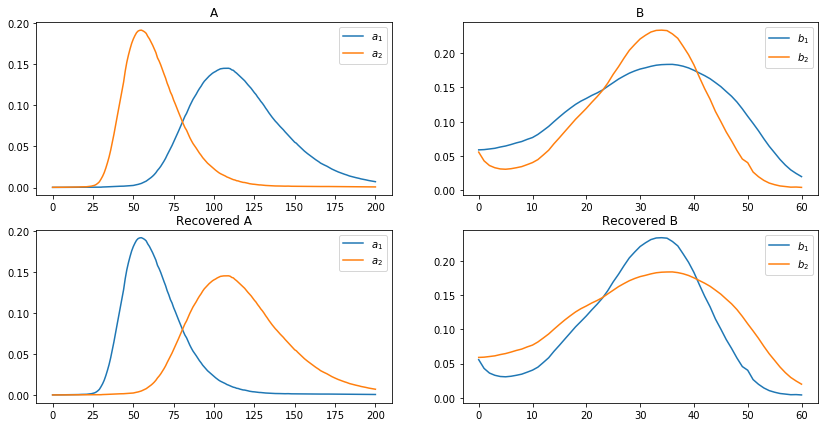

In [4]:
factors, sign, norms = cp.prepare_for_comparison(factors)
fig, axes = plt.subplots(2,2,figsize=(14,7))
axes[0,0].plot(A)
axes[0,1].plot(B)

axes[0,0].set_title("A")
axes[0,1].set_title("B")
axes[0,0].legend(["$a_1$", "$a_2$"])
axes[0,1].legend(["$b_1$", "$b_2$"])

axes[1,0].plot(factors[0])
axes[1,1].plot(factors[1]) 

axes[1,0].set_title("Recovered A")
axes[1,1].set_title("Recovered B")
axes[1,0].legend(["$a_1$", "$a_2$"])
axes[1,1].legend(["$b_1$", "$b_2$"])
plt.show()

# Aminoacid dataset

## Load data

In [5]:
X = loadmat('datasets/aminoacids.mat')['X'][0][0]['data']
#X = X/np.linalg.norm(X)

## Find parafac decomposition with cp_opt

In [6]:
factors, result = cp.cp_opt(X, rank=3, init='random', gtol=1e-5)

In [7]:
print(result.message)
print(f'F(x): { 0.0003137312420869495}')
print(f'Number of iterations: {result.nit}')
print(f'Number of function evaluations: {result.nfev}')

Desired error not necessarily achieved due to precision loss.
F(x): 0.0003137312420869495
Number of iterations: 216
Number of function evaluations: 363


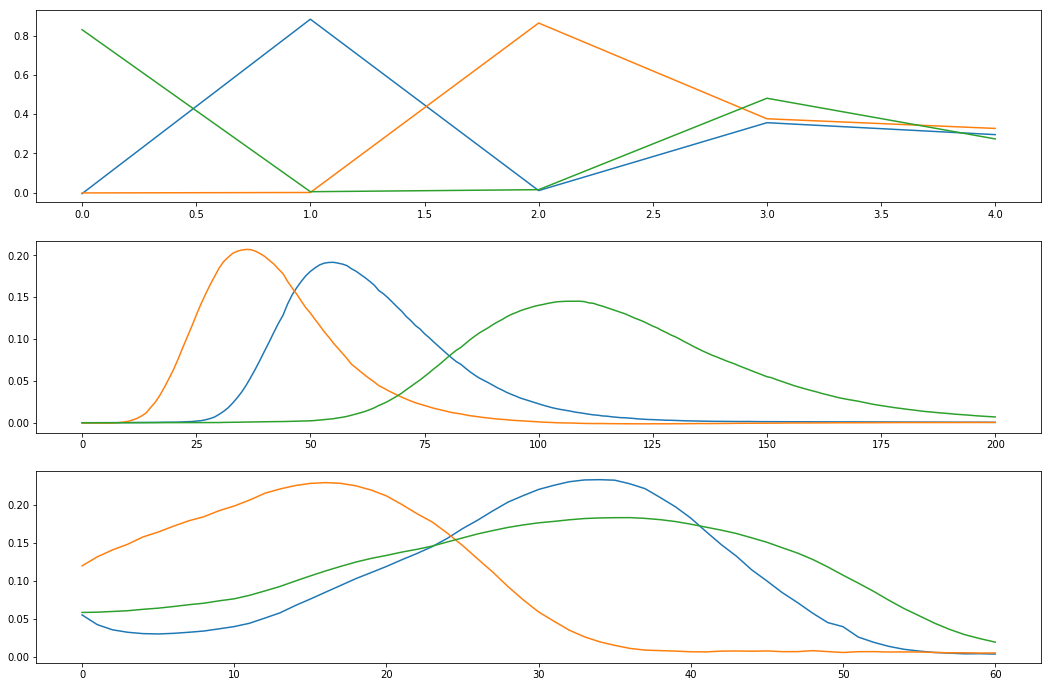

In [8]:
factors, sign, norms = cp.prepare_for_comparison(factors)
fig, axes = plt.subplots(3,1, figsize=(18,12))
for i in range(3):
    axes[i].plot(factors[i])
plt.show()

## What happens when we look for wrong amount of  factors?

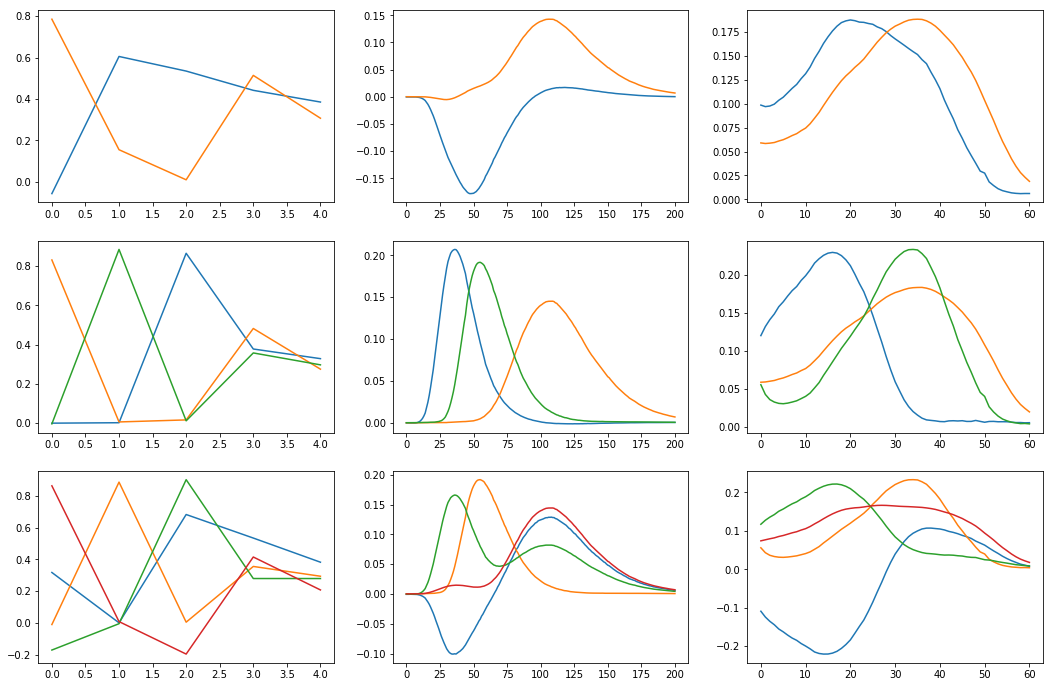

In [9]:
rank_list = [2,3,4]

fig, axes = plt.subplots(len(rank_list), 3, figsize=(18,12))
    
for i, rank in enumerate(rank_list):
    factors_unnorm, result = cp.cp_opt(X, rank=rank, init='random', gtol=1e-10)
    factors, sign, norms = cp.prepare_for_comparison(factors_unnorm)
    for j in range(3):
        axes[i][j].plot(factors[j])
        
plt.show()

## We can look at the weights of each component in the four component model

In [10]:
weights = np.prod(norms,axis=0).squeeze()

for i,w in enumerate(weights):
    print(f'Component {i:d} has weight {w:.2f}')

Component 0 has weight 10725.98
Component 1 has weight 23449.14
Component 2 has weight 21885.14
Component 3 has weight 35135.10
